In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_data_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_data_df = pd.merge(clinical_data_df, mouse_data_df, on= "Mouse ID", how="left")

# Display the data table for preview
mouse_clinical_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_mouse_clinical = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
mouse_clinical = mean_mouse_clinical["Tumor Volume (mm3)"].mean()
mouse_clinical
# Convert to DataFrame
Tumor_response_df = pd.DataFrame(mouse_clinical).reset_index()
# Preview DataFrame
Tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_mouse_cli = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
SE_mouse_clinical = SE_mouse_cli["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
SE_mo_cl = pd.DataFrame(SE_mouse_clinical).reset_index()
SE_mouse_clin = SE_mo_cl.pivot(index = "Timepoint", columns = "Drug")
# Preview DataFrame
SE_mouse_clin.head()


Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_mung = Tumor_response_df.pivot(index = "Timepoint", columns= "Drug")
mouse_clinical_mung.head()
# Preview that Reformatting worked


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
mouse_clinical_mung.columns = mouse_clinical_mung.columns.droplevel()
mouse_clinical_mung.columns


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [6]:
Tumor_response_df.columns

Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')

In [7]:
SE_mouse_clin.columns = SE_mouse_clin.columns.droplevel()
SE_mouse_clin.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

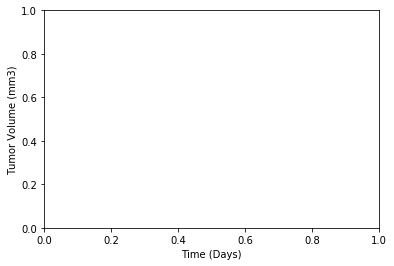

In [10]:
# Generate the Plot (with Error Bars)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.errorbar(Tumor_response_df, mouse_clinical_mung.columns["Capomulin"], yerr=SE_mouse_clin.columns["Capomulin"]) 

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_mouse_clinical = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
mouse_clinical_met = mean_met_mouse_clinical["Metastatic Sites"].mean()
mouse_clinical_met
# Convert to DataFrame
Metastatic_response_df = pd.DataFrame(mouse_clinical_met).reset_index()
# Preview DataFrame
Metastatic_response_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_mouse_clinical_met = mean_met_mouse_clinical["Metastatic Sites"].sem()
# Convert to DataFrame
SE_mo_cl_met = pd.DataFrame(SE_mouse_clinical_met).reset_index()
# Preview DataFrame
SE_mo_cl_met.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_minor_mung = Metastatic_response_df.pivot(index = "Timepoint", columns= "Drug")
mouse_clinical_minor_mung
# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
mice_count = count_of_mice["Mouse ID"].count()
mice_count
# Convert to DataFrame
mice_count_grouped = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
mice_count_grouped.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_mung = mice_count_grouped.pivot(index = "Timepoint", columns= "Drug")
count_mice_mung.head()
# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()